Dataset: IMDB()
Number of graphs: 1
Number of features: {'movie': 3066, 'director': 3066, 'actor': 3066}

First graph: HeteroData(
  movie={
    x=[4278, 3066],
    y=[4278],
    train_mask=[4278],
    val_mask=[4278],
    test_mask=[4278],
  },
  director={ x=[2081, 3066] },
  actor={ x=[5257, 3066] },
  (movie, to, director)={ edge_index=[2, 4278] },
  (movie, to, actor)={ edge_index=[2, 12828] },
  (director, to, movie)={ edge_index=[2, 4278] },
  (actor, to, movie)={ edge_index=[2, 12828] }
)
Number of nodes: 11616
Number of edges: 34212
Has isolated nodes: False
Has self-loops: False
Is undirected: True


KeyboardInterrupt: 

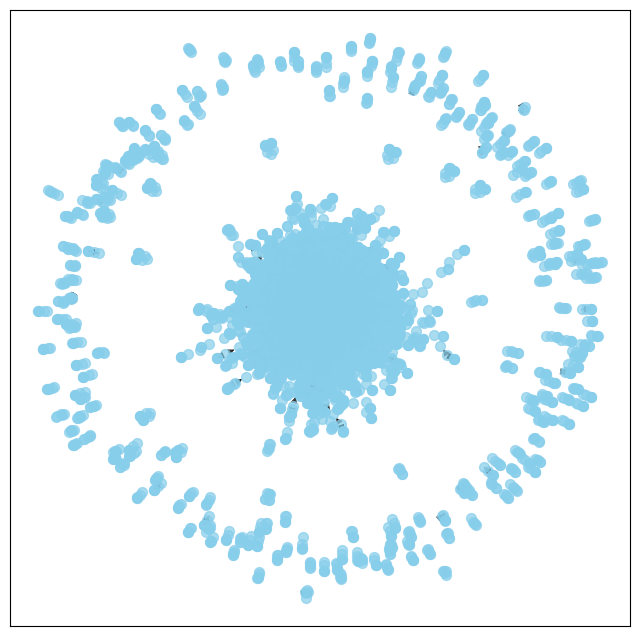

In [8]:
# Load the IMDB dataset from torch_geometric and visualize the graph using networkx
from torch_geometric.datasets import IMDB
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

# Load the IMDB-BINARY dataset
# IMDB class loads a collection of graphs.
# We'll pick the first graph for visualization.
dataset = IMDB(root='./data/IMDB')

print(f'Dataset: {dataset}')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')

# Since the 'num_classes' attribute does not exist, we will skip printing it
# print(f'Number of classes: {dataset.num_classes}')

# Get the first graph from the dataset
data = dataset[0]

print(f'\nFirst graph: {data}')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

# Convert the PyG graph to a NetworkX graph without using 'to_undirected'
G = to_networkx(data)

# Visualize the graph using NetworkX and Matplotlib
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)  # For consistent layout
nx.draw_networkx(G, pos, with_labels=False, node_size=50, width=0.5, alpha=0.7, node_color='skyblue')
plt.title("Visualization of a graph from IMDB-BINARY dataset")
plt.show()


IMDB dataset loaded successfully.
Number of graphs in the dataset: 1
------------------------------
Graph details:
Number of nodes: 11616
Number of edges: 34212
Number of features: {'movie': 3066, 'director': 3066, 'actor': 3066}
Graph is directed: False
------------------------------


AttributeError: 'IMDB' object has no attribute 'num_classes'

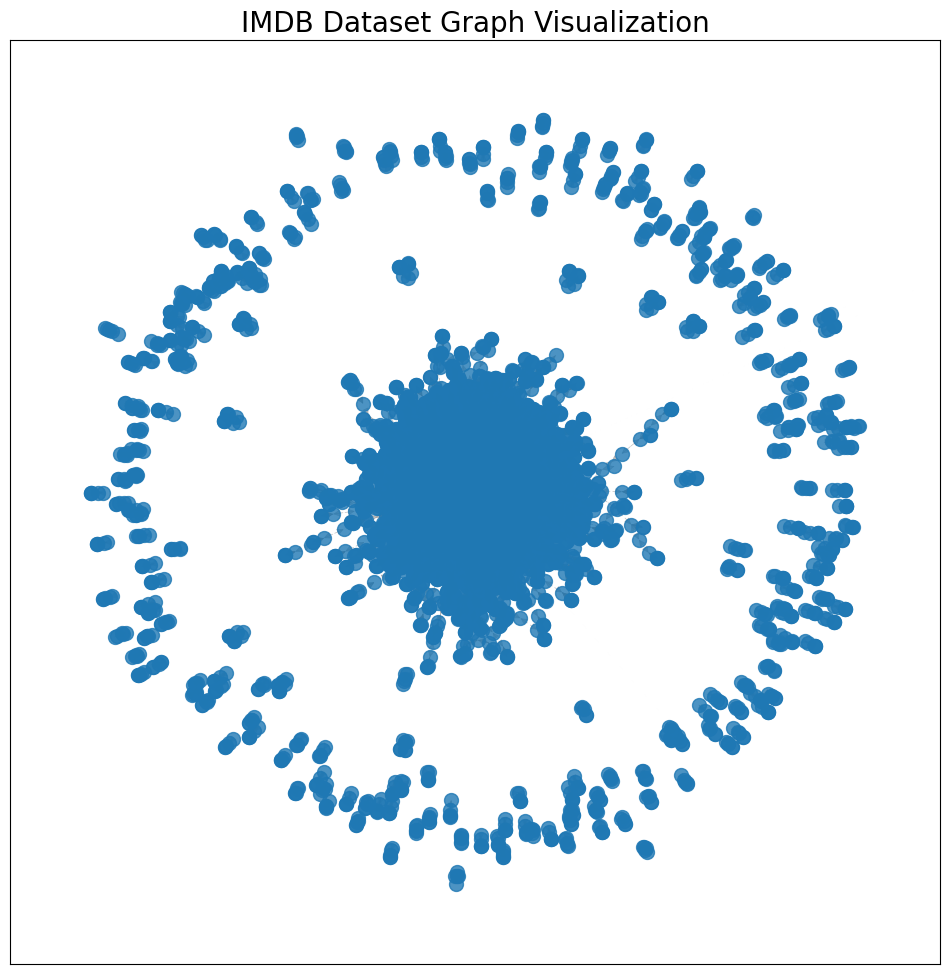

In [ ]:
# Load the IMDB dataset
# The dataset will be downloaded to the 'data/IMDB' directory
dataset = IMDB(root='data/IMDB')
print("IMDB dataset loaded successfully.")
print(f"Number of graphs in the dataset: {len(dataset)}")
print("-" * 30)

# Get the first graph from the dataset
data = dataset[0]

print("Graph details:")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of features: {data.num_node_features}")
# print(f"Number of classes: {dataset.num_classes}")
print(f"Graph is directed: {data.is_directed()}")
print("-" * 30)


# Convert the torch_geometric graph to a NetworkX graph
# We need to specify which node attributes to keep. Here we keep 'x' (features) and 'y' (labels).
g = to_networkx(data)

# Create a color map for the nodes based on their class (y attribute)
# We'll use a different color for each genre
# colors = [label.item() for _, label in g.nodes(data='y')]
# cmap = plt.get_cmap('viridis', dataset.num_classes)

# Set up the plot
plt.figure(figsize=(12, 12))
plt.title('IMDB Dataset Graph Visualization', fontsize=20)

# Use a spring layout for better visualization
pos = nx.spring_layout(g, seed=42)

# Draw the graph
nx.draw_networkx_nodes(g, pos, node_size=100, alpha=0.8)
nx.draw_networkx_edges(g, pos, width=0.5, alpha=0.5, edge_color='gray')

# Add a color bar to show the mapping from colors to classes
# sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=dataset.num_classes-1))
# sm.set_array([])
# cbar = plt.colorbar(sm, ticks=range(dataset.num_classes), label='Node Class (Genre)')


print("Displaying graph visualization...")
plt.show()